# Explore here

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn.metrics import specificity_score

url = "/workspaces/Random_Forest_PereHDZ/diabetes_data.csv"

df = pd.read_csv(url, sep=',')

df.to_csv('diabetes-data.csv', index=False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
'''Since this is the same dataset as the previous exercise, we won't perform an EDA. We could scale and split the data right away, however, 
as pointed out in the correction of said exercise, we should first tackle all the impossible 0 values in our dataset. We will replace them 
for the median of their column'''

columns_with_impossible_0 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_impossible_0:
    median_value = df[col][df[col] != 0].median()
    df[col] = df[col].replace(0, median_value)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Now that the 0s are dealt with, we can proceed with the data split
df_scaled = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis = 1)), columns=df.columns[: -1])
df_scaled['Outcome'] = df.Outcome

X = df_scaled.drop(['Outcome'], axis=1)
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#And we will porceed to create two random forests
rf_simple = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2, min_samples_leaf=20, max_features=X_train.shape[1]//2)
rf_complex = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1, max_features=int(X_train.shape[1]*0.8))

rf_simple.fit(X_train, y_train)
rf_complex.fit(X_train, y_train)

#Evaluate simple model
train_pred_simple = rf_simple.predict(X_train.values)
test_pred_simple = rf_simple.predict(X_test.values)

#Evaluate complex model
train_pred_complex = rf_complex.predict(X_train.values)
test_pred_complex = rf_complex.predict(X_test.values)

#Create function to get the metrics
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

#Get metrics for simple random forest
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.780130,0.617564,0.717215,0.778571,0.511737,0.922693
Test,0.785714,0.659794,0.740404,0.761905,0.581818,0.898990
Diferencia,-0.005584,-0.042230,-0.023189,0.016667,-0.070081,0.023703


In [5]:
#Get metrics for complex random forest
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.766234,0.689655,0.757576,0.655738,0.727273,0.787879
Diferencia,0.233766,0.310345,0.242424,0.344262,0.272727,0.212121


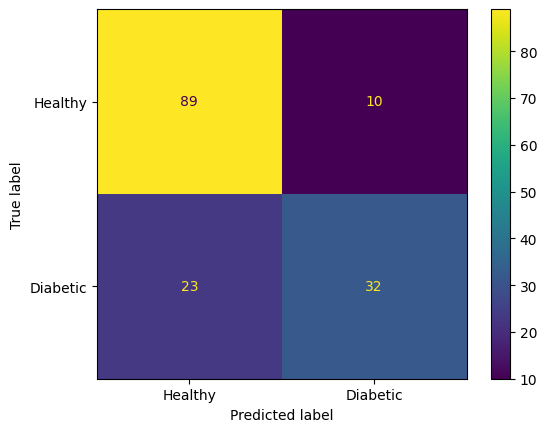

In [6]:
#Plot confusion matrix
cm = confusion_matrix(y_test, test_pred_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Diabetic'])
disp.plot()

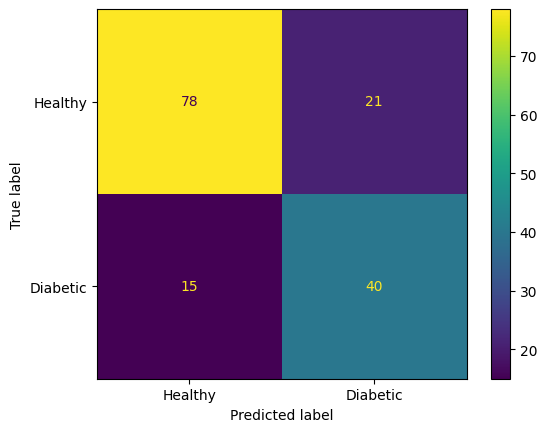

In [7]:
cm = confusion_matrix(y_test, test_pred_complex)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Diabetic'])
disp.plot()

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

After printing the metrics and plotting the confusion matrix, I would argue that neither model is accurate enough to be used in a medical and they have the following issues:

The complex tree model has a perfect score in every single metric for the training data. As counterintuitive as it may be, this actually shows that our model is too specific and makes its analisys patient per patient instead of grouping them by charachteristics and making a general diagnosis for all of them. This is very costly and doesn't allow much generalization. 

Though, at a first glance, we might conclude that the simple model is better because it has a higher precission, this would be a wrong assumption. The reason why the the simple model has higher precission is because our dataset has more healthy people than diabetic (500 to 298), and the simple model tends to predict healthy. This is why it has an arguably high specificity (89.8990%) but a very low recall (58.1818%). The better model in this case is the complex one, since, despite having a lower precission (65.5738% vs 76.1905%), its specificity and recall values are more simillar (78.7879% and 72.7273% respectively), and thus shows a lower tendency towards healthy.

Nonetheless, no model reaches even a 90% in any metric for the test sample. Considering how this is a medical setting, its predicatbility is too low to be used. A way to improve it might be with having a bigger sample size.